<a href="https://colab.research.google.com/github/omprakash003/Data_analytics/blob/master/IMDB_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv("/content/IMDB_Dataset.csv")
import re
def clean_text(text):
    return re.sub(r'<.*?>', '', text)

df['review'] = df['review'].apply(clean_text)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    words = re.sub(r'[^a-zA-Z]', ' ', text).lower().split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(preprocess)


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8864
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



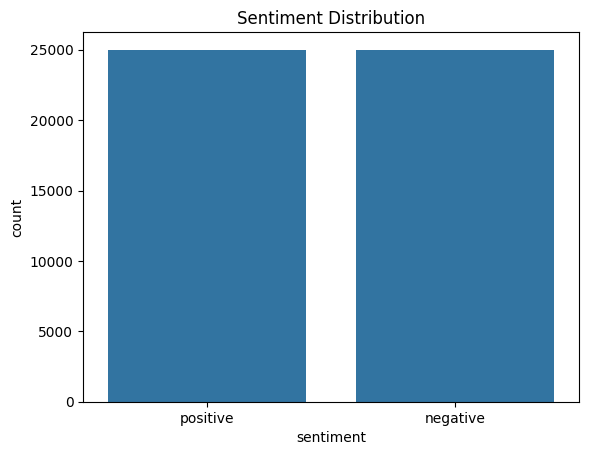

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
print(df.columns)

Index(['review', 'sentiment', 'clean_review', 'sentiment_score',
       'sentiment_label'],
      dtype='object')


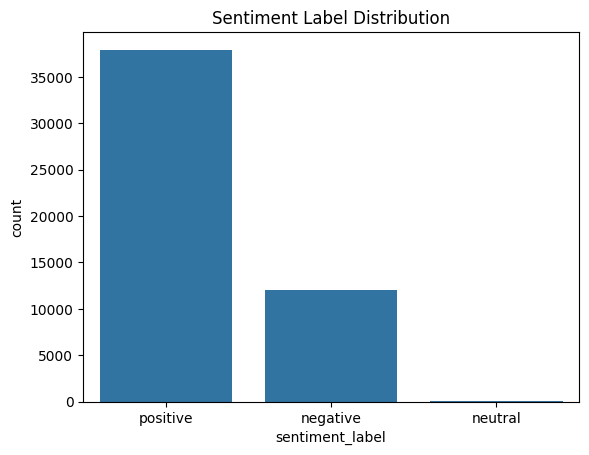

In [ ]:
from textblob import TextBlob

# Apply sentiment analysis to the reviews
df['sentiment_score'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize as positive, neutral, negative based on score
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

# Compare sentiment vs. rating
sns.countplot(x='sentiment_label', data=df)
plt.title("Sentiment Label Distribution")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Convert reviews to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['sentiment_label'])

# Target variable (rating or sentiment)
y = df['sentiment_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%
